<a href="https://colab.research.google.com/github/ArezaB/Reza/blob/main/MKforTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These codes implement MannKendall test for trend analysis of temprature data, and save the results in csv files (without plots)

In [ ]:
!pip install pymannkendall

In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving Merged_TMX_Data.csv to Merged_TMX_Data.csv


In [ ]:
import pandas as pd
import pymannkendall as mk
from google.colab import files

# Load the data from the uploaded CSV file
df = pd.read_csv('Merged_TMX_Data.csv')

# Drop the Date column
data = df.drop(columns=['Date'])

# Prepare a list to collect the results
results_list = []

# Iterate over each column and perform the Mann-Kendall test
for column in data.columns:
    series = data[column]
    result = mk.original_test(series)

    # Determine significance based on the p-value
    significance = "Significant" if result.p < 0.05 else "Not Significant"

    # Collect results into a dictionary
    result_dict = {
        'Station': column,
        'Trend': result.trend,
        'Tau': result.Tau,
        'Slope': result.slope,
        'Intercept': result.intercept,
        'p-value': result.p,
        'Significance': significance
    }

    # Append the dictionary to the list
    results_list.append(result_dict)

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results_list)

# Save the results to a CSV file
results_filename = 'MannKendall_Results.csv'
results_df.to_csv(results_filename, index=False)

# Notify the user
print(f'Results saved to {results_filename}')

# Download the results CSV file
files.download(results_filename)

Results saved to MannKendall_Results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import pymannkendall as mk
from google.colab import files

# Load the data from the uploaded CSV file
df = pd.read_csv('Merged_TMN_Data.csv')

# Drop the Date column
data = df.drop(columns=['Date'])

# Prepare a list to collect the results
results_list = []

# Iterate over each column and perform the Mann-Kendall test
for column in data.columns:
    series = data[column]
    result = mk.original_test(series)

    # Determine significance based on the p-value
    significance = "Significant" if result.p < 0.05 else "Not Significant"

    # Collect results into a dictionary
    result_dict = {
        'Station': column,
        'Trend': result.trend,
        'Tau': result.Tau,
        'Slope': result.slope,
        'Intercept': result.intercept,
        'p-value': result.p,
        'Significance': significance
    }

    # Append the dictionary to the list
    results_list.append(result_dict)

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results_list)

# Save the results to a CSV file
results_filename = 'MannKendall_Results.csv'
results_df.to_csv(results_filename, index=False)

# Notify the user
print(f'Results saved to {results_filename}')

# Download the results CSV file
files.download(results_filename)

These codes implement MannKendall test for trend analysis of temprature data, and save the results in csv files with plots

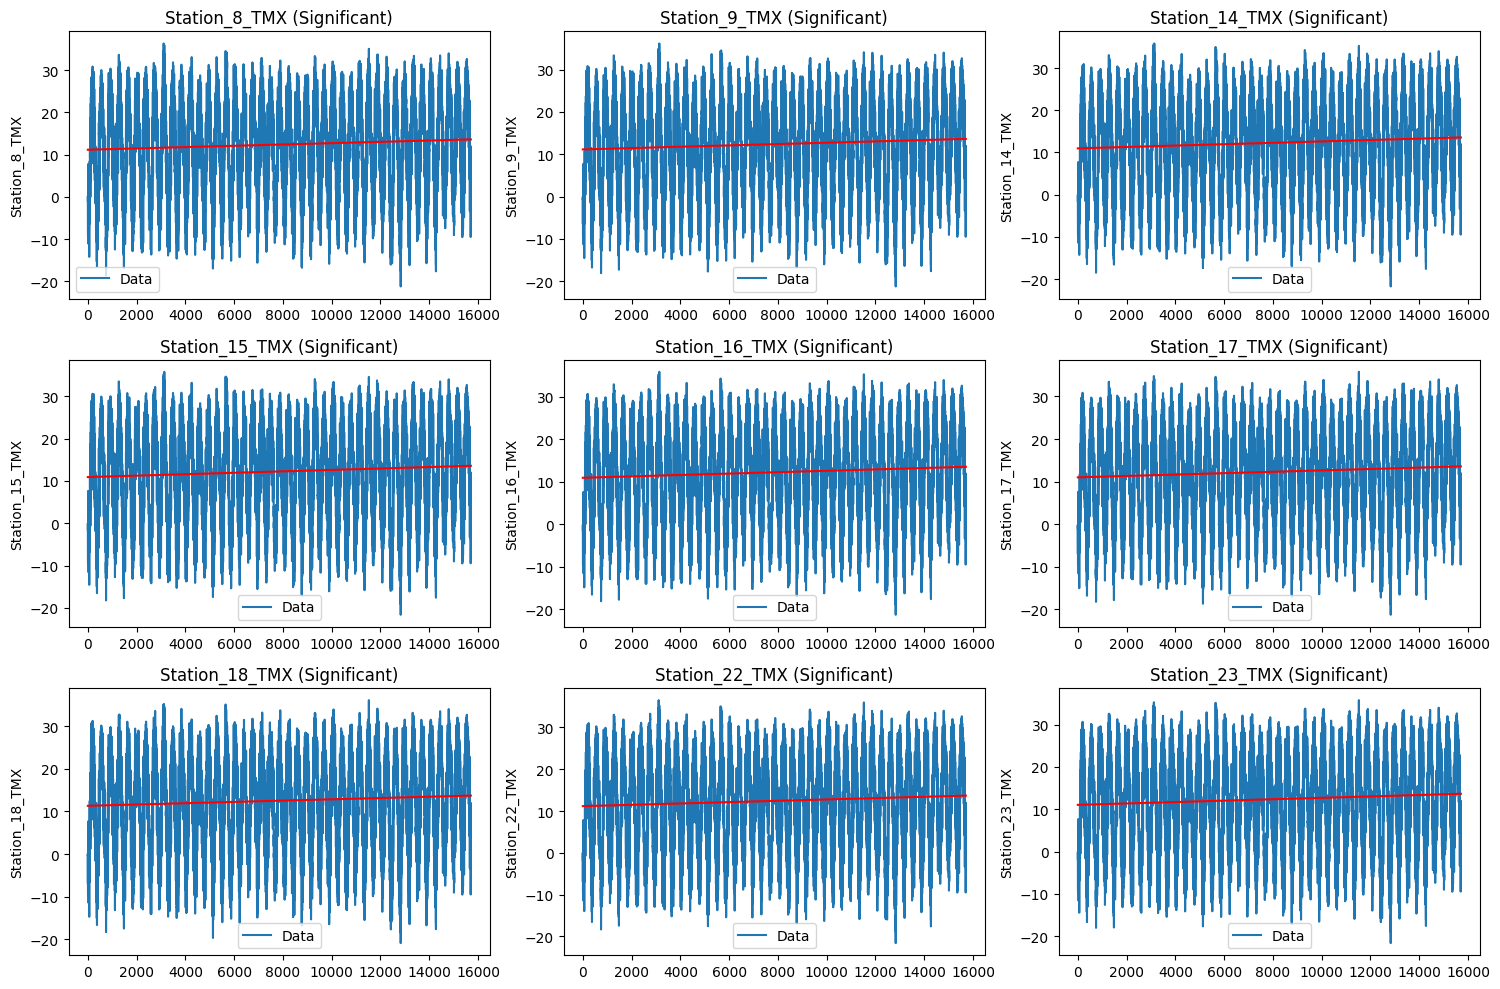

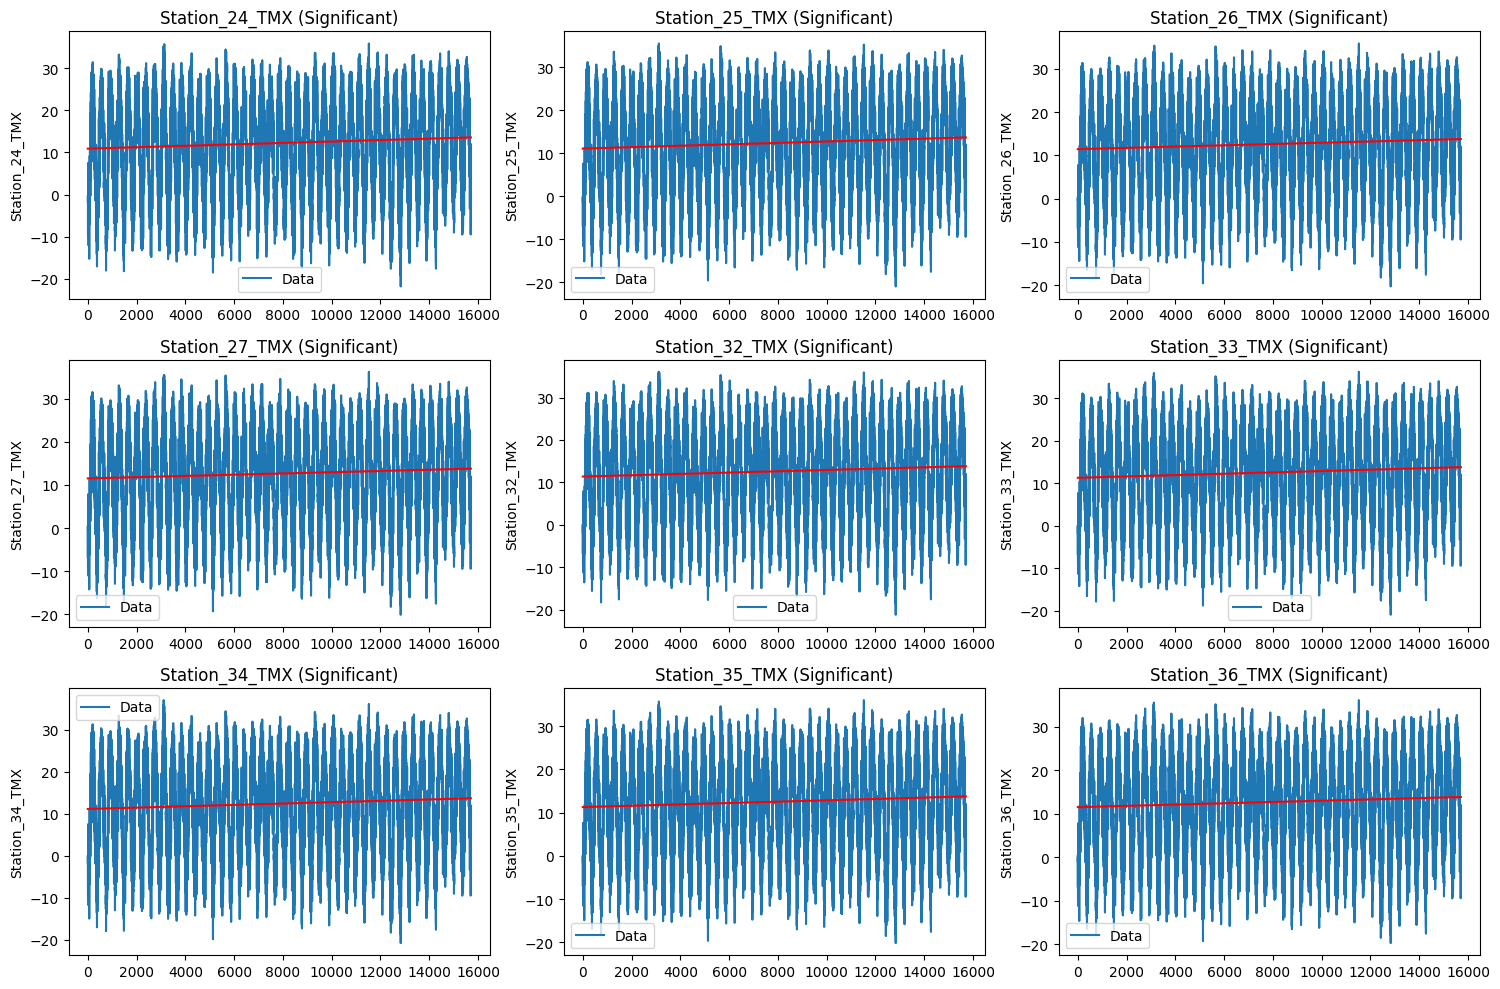

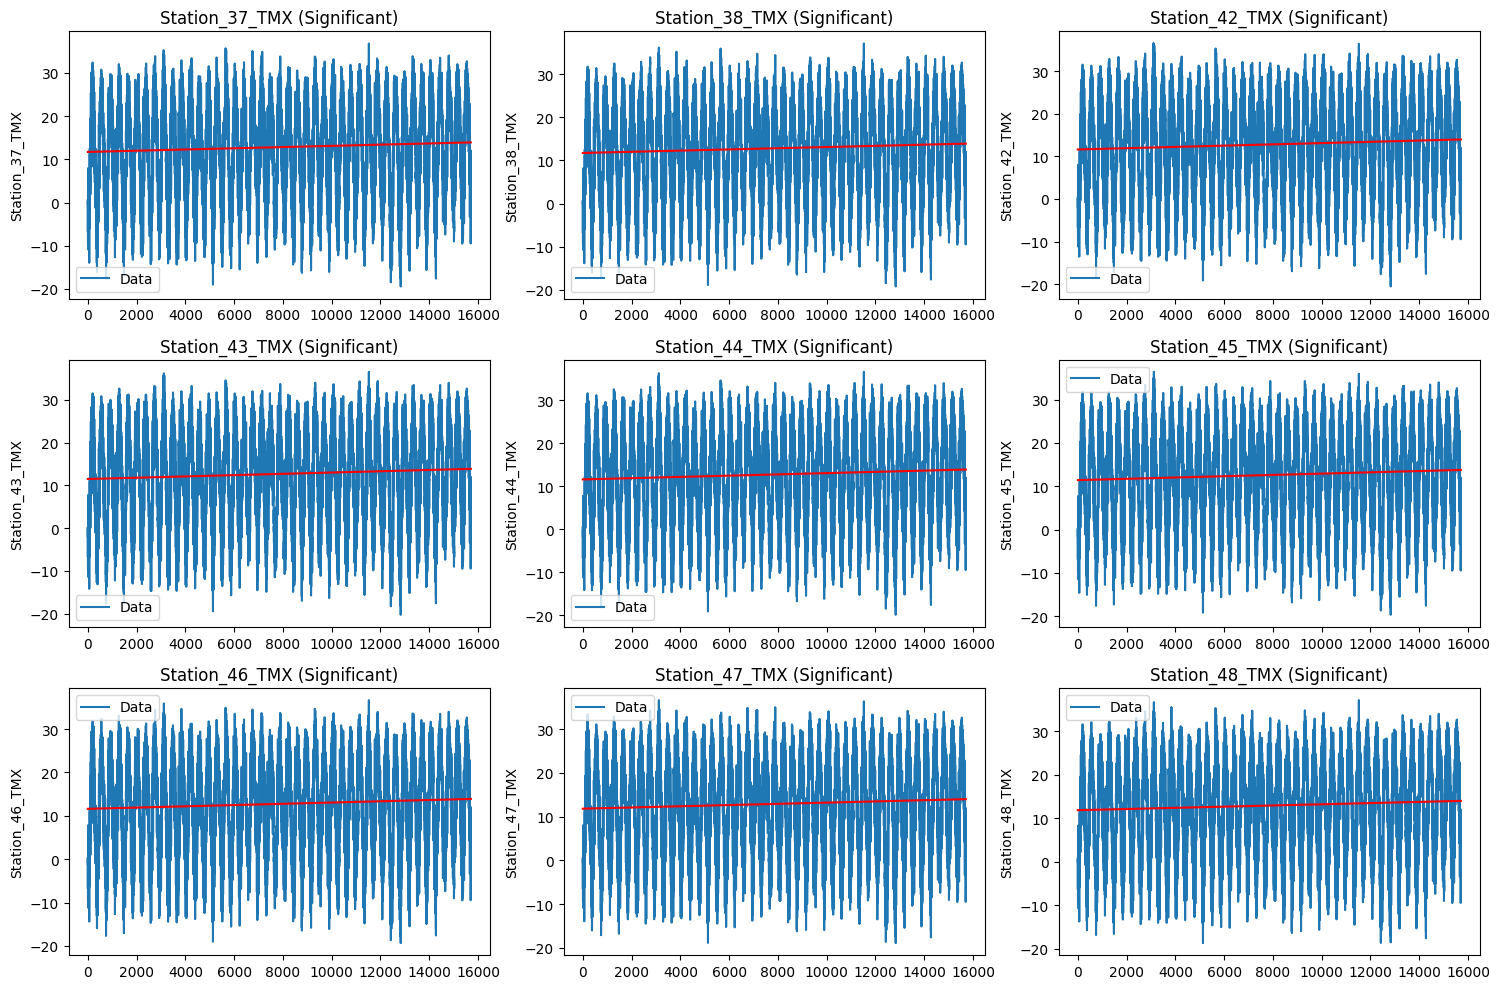

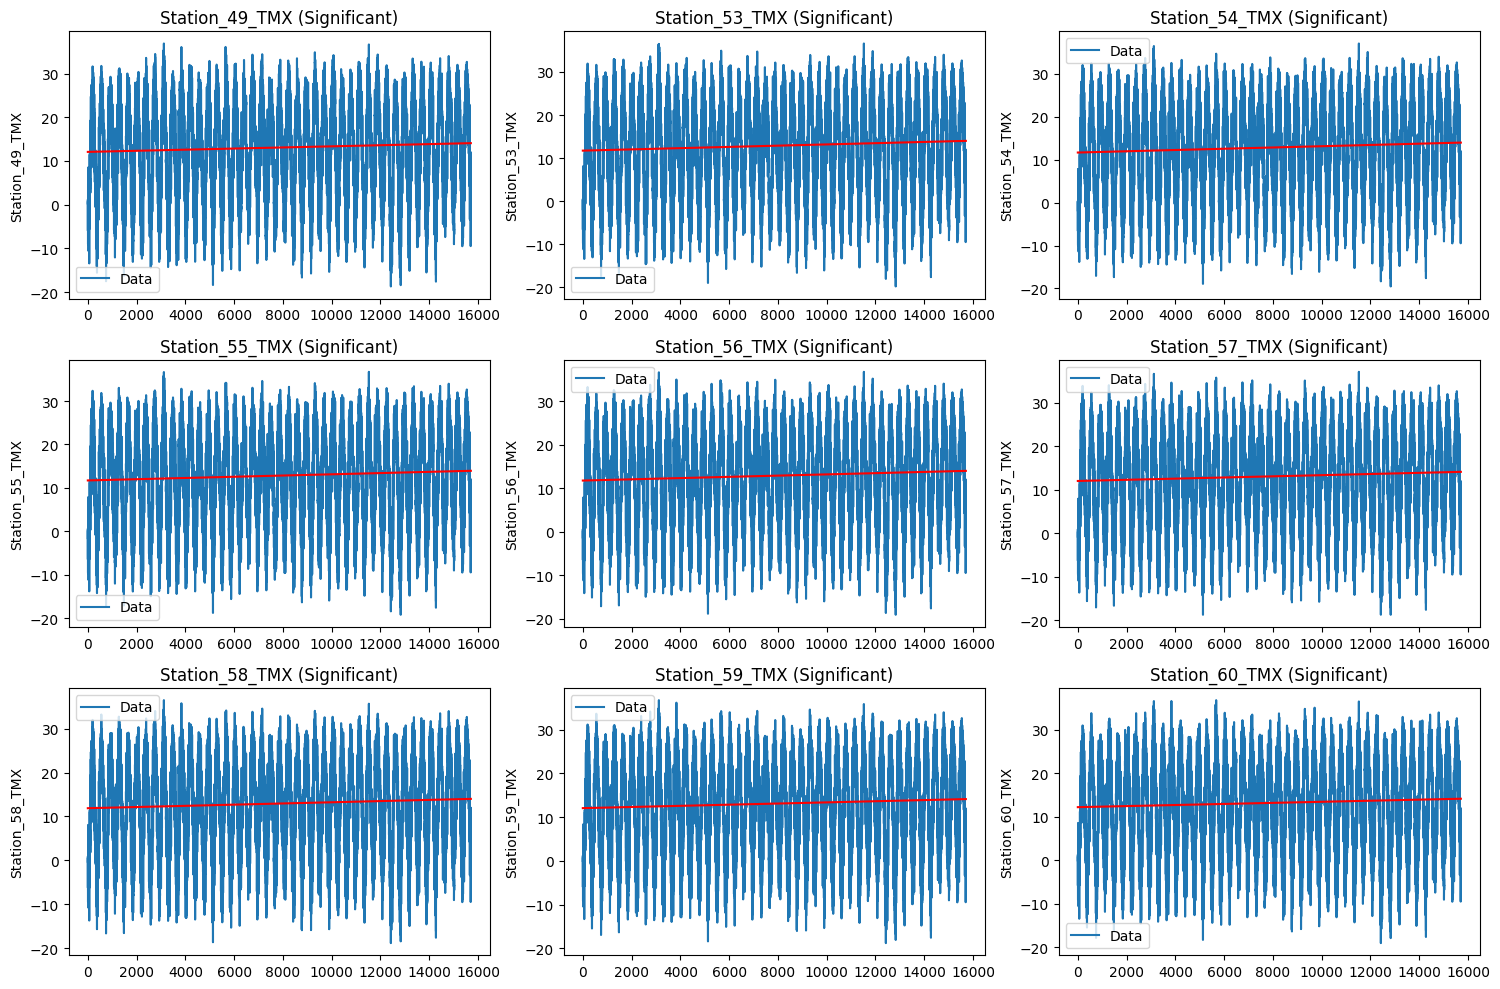

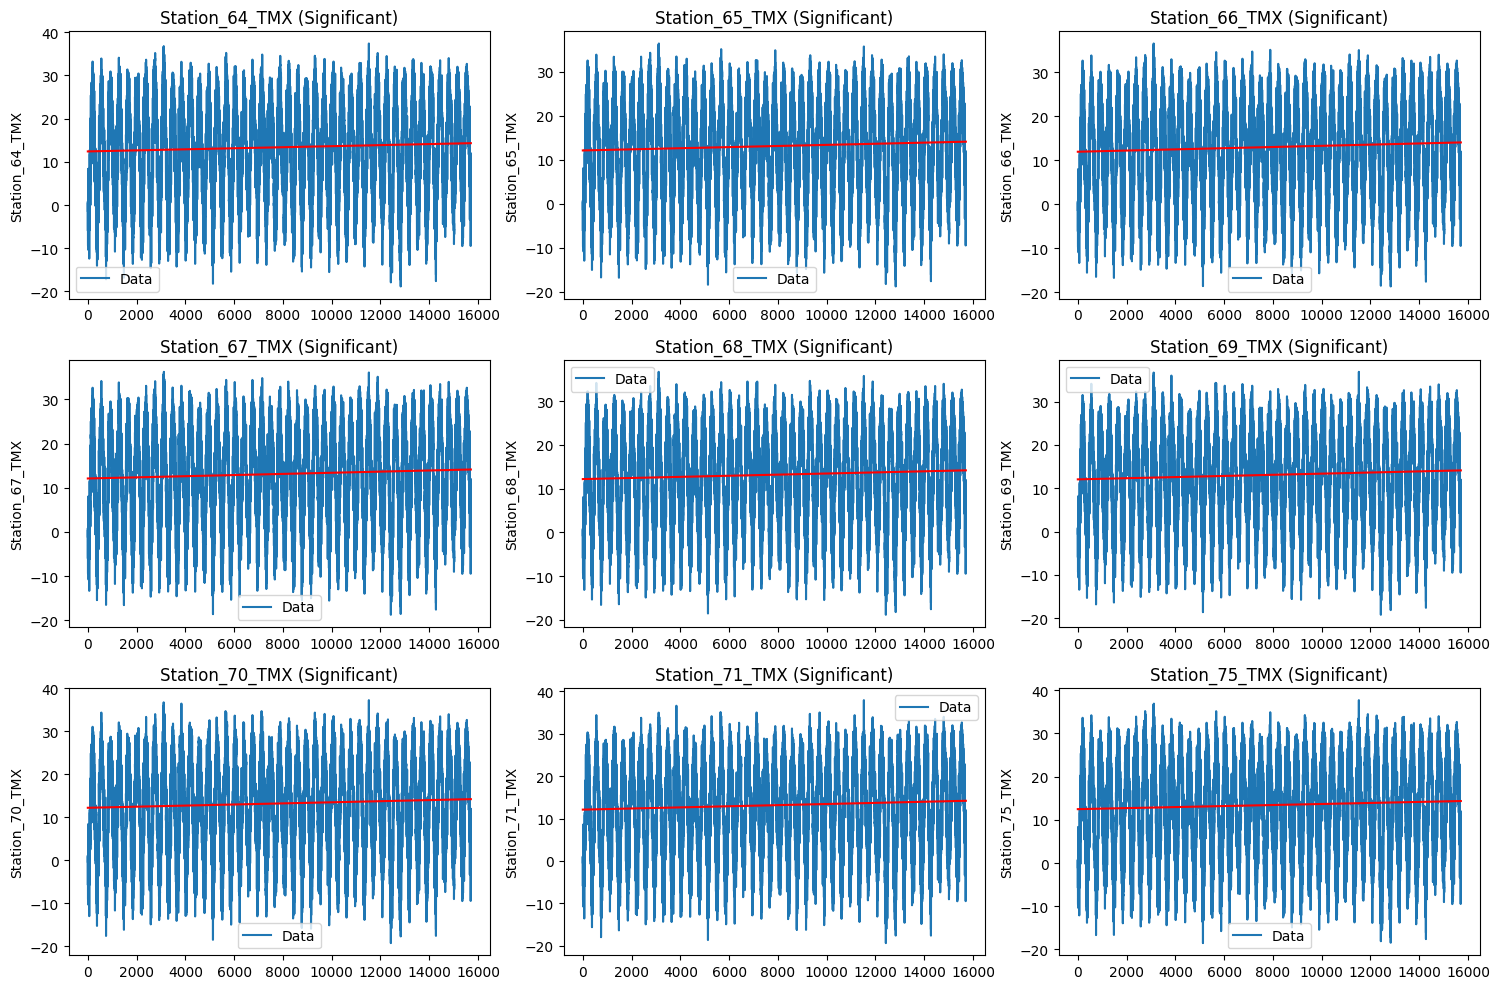

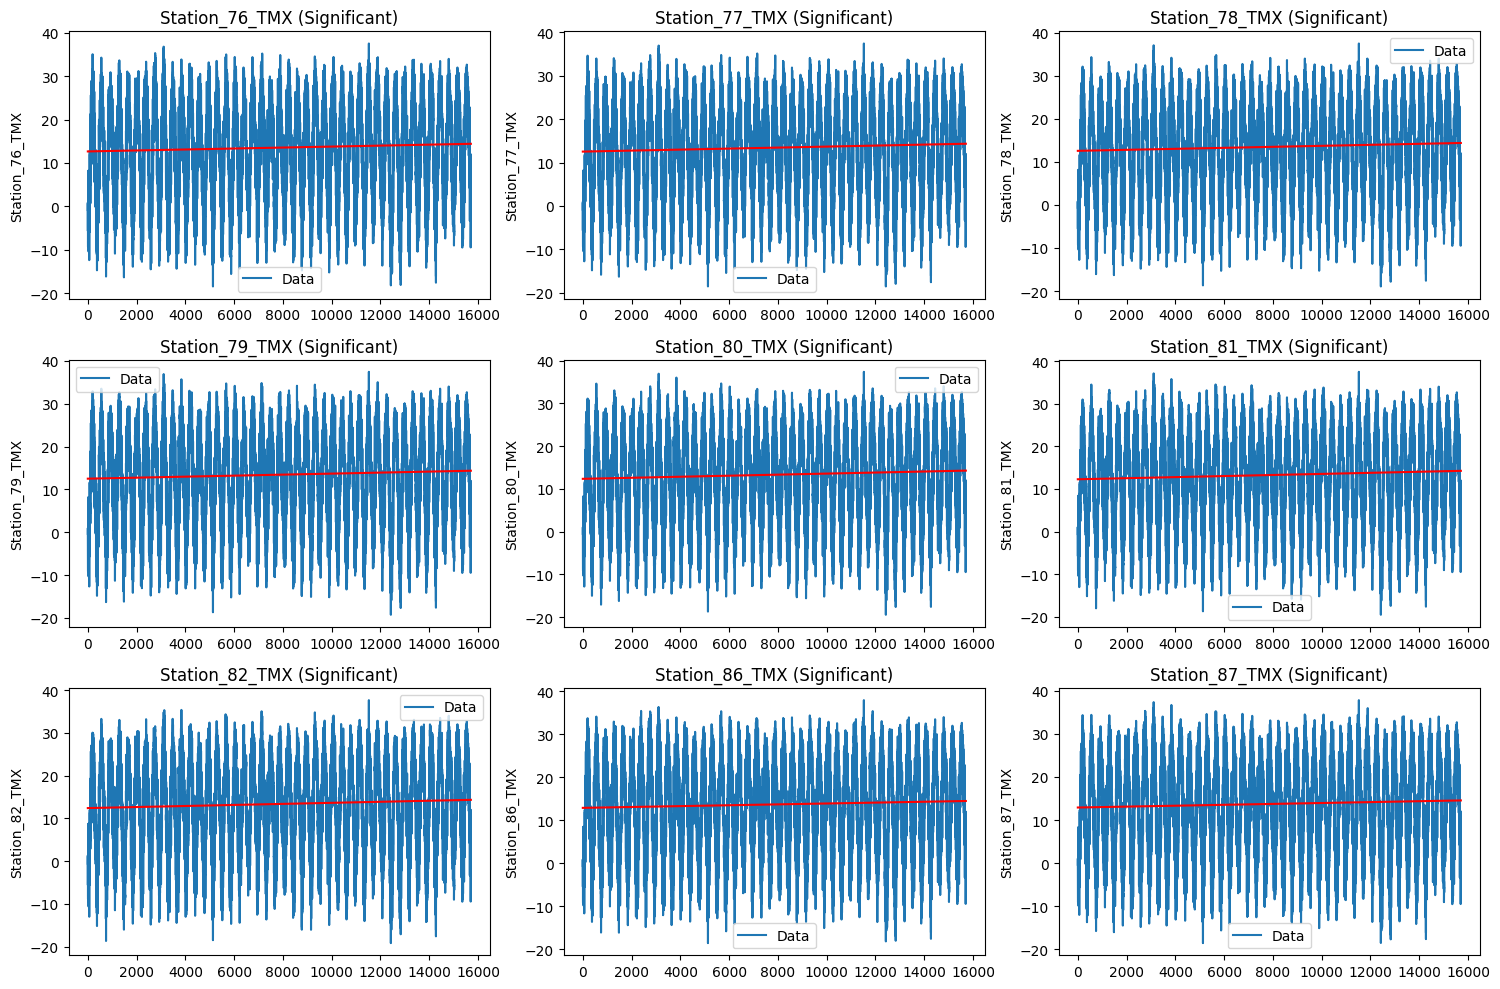

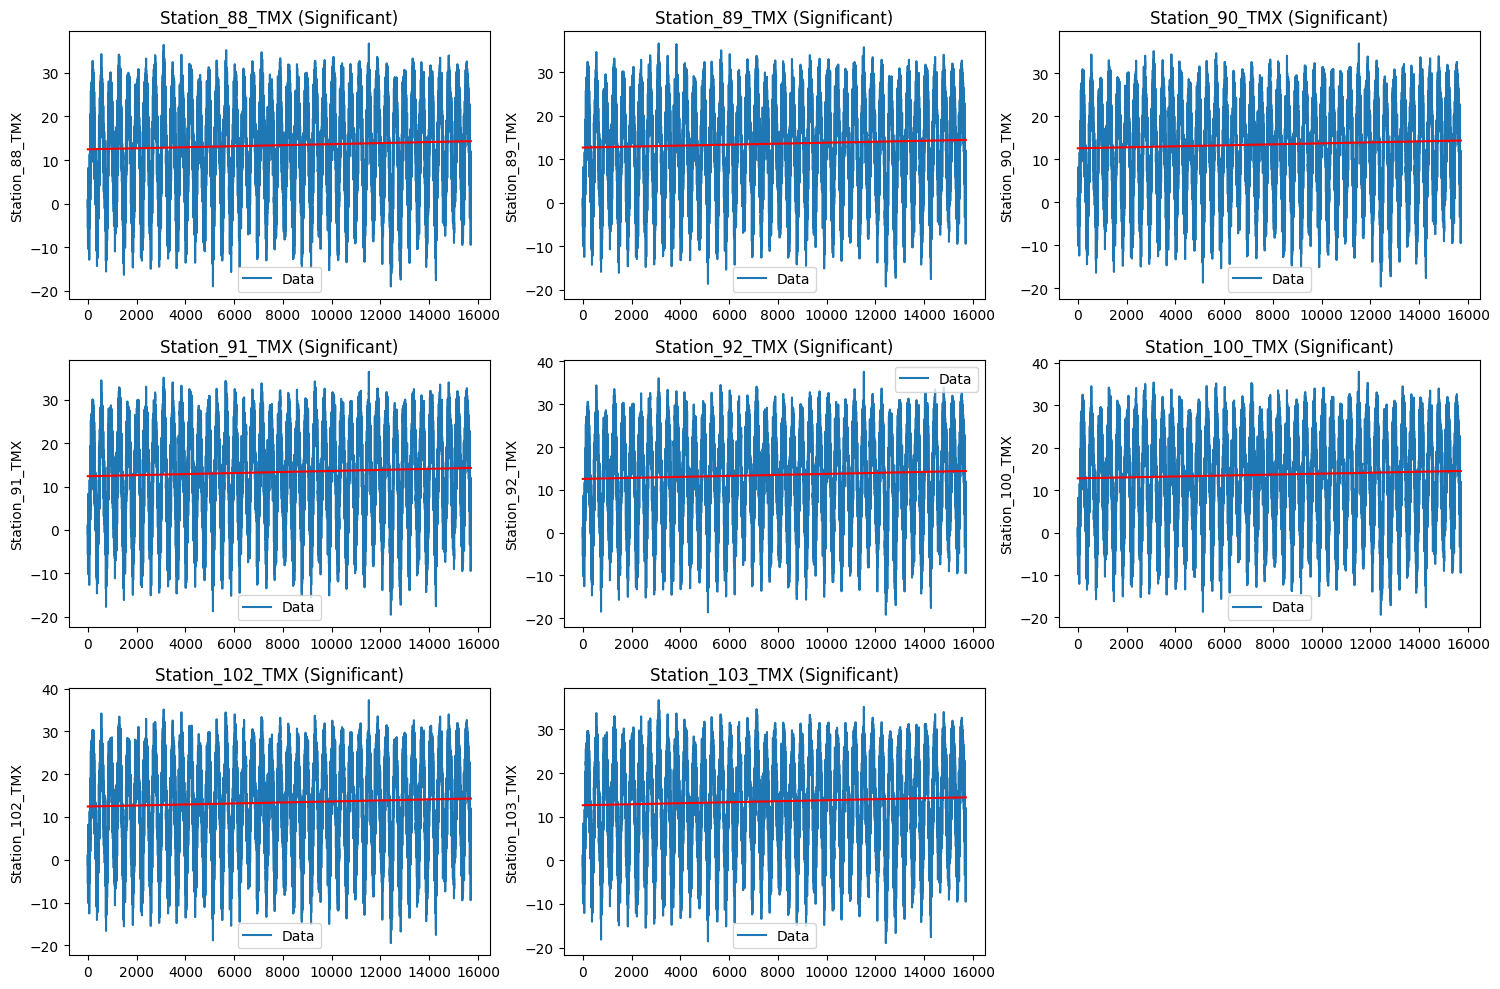

Results saved to MannKendall_Results.csv


In [ ]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the data
df = pd.read_csv('Merged_TMX_Data.csv')

# Drop the Date column
data = df.drop(columns=['Date'])

# Prepare a list to collect the results
results_list = []

# Iterate over each column and perform the Mann-Kendall test
for column in data.columns:
    series = data[column]
    result = mk.original_test(series)

    # Determine significance based on the p-value
    significance = "Significant" if result.p < 0.05 else "Not Significant"

    # Collect results into a dictionary
    result_dict = {
        'Station': column,
        'Trend': result.trend,
        'Tau': result.Tau,
        'Slope': result.slope,
        'Intercept': result.intercept,
        'p-value': result.p,
        'Significance': significance
    }

    # Append the dictionary to the list
    results_list.append(result_dict)

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results_list)

# Plotting settings
num_stations = len(data.columns)
stations_per_plot = 9
num_plots = math.ceil(num_stations / stations_per_plot)

# Create the plots
for i in range(num_plots):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # 3x3 grid for each plot
    axes = axes.flatten()  # Flatten to easily index

    # Select the stations for the current plot
    start_idx = i * stations_per_plot
    end_idx = min(start_idx + stations_per_plot, num_stations)
    selected_stations = data.columns[start_idx:end_idx]

    for idx, station in enumerate(selected_stations):
        # Get the time series for the current station
        series = data[station]
        # Plot the data
        sns.lineplot(ax=axes[idx], data=series, label='Data')

        # Add a trend line based on Mann-Kendall slope and intercept
        slope = results_df.loc[results_df['Station'] == station, 'Slope'].values[0]
        intercept = results_df.loc[results_df['Station'] == station, 'Intercept'].values[0]
        trend_line = slope * series.index + intercept
        axes[idx].plot(series.index, trend_line, label=f"Trend (slope={slope:.2f})", color='red')

        # Mark significance
        significance = results_df.loc[results_df['Station'] == station, 'Significance'].values[0]
        axes[idx].set_title(f'{station} ({significance})')

    # Remove unused subplots in case of fewer than 9 stations
    for j in range(idx + 1, 9):
        fig.delaxes(axes[j])

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Save the results to a CSV file
results_filename = 'MannKendall_Results.csv'
results_df.to_csv(results_filename, index=False)

print(f'Results saved to {results_filename}')
